# Introducción

El servicio de telefonía virtual CallMeMaybe, es una empresa externa que ofrece el servicio de centro de llamadas para otras organizaciones que lo requieren. Y ofrece el servicio de recepción y emisión de llamadas. La eficacia de los operadores es importante, ya que está relacionado con la satisfacción del cliente, por lo tanto la eficacia de los operadores conlleva a una mayor retención y adquisición de clientes. 

El servicioCallMeMaybe está desarrollando una nueva función que brindará a los supervisores y las supervisores información sobre los operadores menos eficaces. Se considera que un operador es ineficaz si tiene una gran cantidad de llamadas entrantes perdidas (internas y externas) y un tiempo de espera prolongado para las llamadas entrantes. Además, si se supone que un operador debe realizar llamadas salientes, un número reducido de ellas también será un signo de ineficacia.


## Links a carpeta de Drive y Dashboard

**Carpeta Drive:**  
<https://drive.google.com/drive/folders/1Bd0_ZgTNEbI1Sg-61cTKj0Iq9kcUQmAm?usp=sharing>  

**Link Dashboard Tableau:**    
<https://public.tableau.com/views/VirtualPhoneService/VirtualPhoneServiceDashboard?:language=es-ES&publish=yes&:sid=&:display_count=n&:origin=viz_share_link>  

# Contenido

* [Objetivos](#objetivos)
* [Etapas](#etapas)
* [Diccionario de Datos](#diccionario)
* [Inicio](#inicio)
* [Procesamiento de Datos](#pre_datos)
* [Análisis de datos](#analisis)
* [Análisis descriptivo de los datos y gráficos de distribución](#estadisticos)
* [Cantidad de llamadas entrantes y salientes y llamadas perdidas](#in_out)
* [Tasa de llamadas perdidas por operador](#missed)
* [Tiempo Medio Operativo (TMO)](#tmo)
* [Tasa del tiempo de espera por operador/a](#waiting_time)
* [Relación entre la tasa de llamadas internas y la duración de las llamadas](#corr)
* [Duración de las llamadas de acuerdo al plan tarifario](#plan)
* [Hipótesis](#hip)
* [Conclusión General](#end)

# Objetivo <a id='objetivos'></a>


1. Identificar a los operadores ineficaces y proporcionar un reporte a las organizaciones para que tomen acciones correctivas e identifiquen áreas de oportunidad a mejorar.

# Etapas <a id='etapas'></a>  

• Preocesamiento de Datos  
• Analisis de datos: cálculo de metricas de interés  
• Pruebas de hipótesis  
• Conclusiones generales

# Inicio 

Importar las librerías necesarias y guardar los datasets que tienen la información de interés. 

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import math as mt
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

# Procesamiento de Datos <a id='pre_datos'></a>

# Análisis de datos <a id='analisis'></a>

# Análisis descriptivo de los datos y gráficos de distribución  <a id='estadisticos'></a>

In [2]:
telecom = pd.read_csv('files\datasets\dataset_and_clients_us.csv')

In [3]:
# se muestran las 5 primeras filas
telecom.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,unknown,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25,B,2019-08-01


In [4]:
# se imprime la información del DataFrame
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49002 entries, 0 to 49001
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              49002 non-null  int64 
 1   date                 49002 non-null  object
 2   direction            49002 non-null  object
 3   internal             49002 non-null  bool  
 4   operator_id          49002 non-null  object
 5   is_missed_call       49002 non-null  bool  
 6   calls_count          49002 non-null  int64 
 7   call_duration        49002 non-null  int64 
 8   total_call_duration  49002 non-null  int64 
 9   waiting_time         49002 non-null  int64 
 10  tariff_plan          49002 non-null  object
 11  date_start           49002 non-null  object
dtypes: bool(2), int64(5), object(5)
memory usage: 3.8+ MB


In [5]:
# las columnas 'date' y 'date_start' se cambian al tipo de dato de fecha
telecom['date'] = pd.to_datetime(telecom['date'])
telecom['date_start'] = pd.to_datetime(telecom['date_start'])

In [6]:
# se calculan los estadísticos descritptivos con describe()
telecom.describe()

,user_id,calls_count,call_duration,total_call_duration,waiting_time,date_start
count,49002.000000,49002.000000,49002.000000,49002.000000,49002.000000,49002
mean,167294.892759,16.462777,866.282091,1156.558202,290.276111,2019-09-09 00:24:35.792824576
min,166377.000000,1.000000,0.000000,0.000000,0.000000,2019-08-01 00:00:00
25%,166782.000000,1.000000,0.000000,46.000000,17.000000,2019-08-19 00:00:00
50%,167158.000000,4.000000,37.000000,208.000000,55.000000,2019-09-04 00:00:00
75%,167819.000000,12.000000,570.000000,901.000000,200.000000,2019-10-01 00:00:00
max,168606.000000,4817.000000,144395.000000,166155.000000,46474.000000,2019-10-31 00:00:00
std,598.558965,63.604098,3775.503352,4451.473661,1132.155291,NaN


In [7]:
# se grafica un histograma para el número de llamadas
fig1 = px.histogram(telecom, 
                    x="calls_count",
                    title="Distribución del número de llamadas",
                    nbins= 80
                    )
fig1.show()

In [8]:
# se grafica un histograma para la Duración de las llamadas
fig2 = px.histogram(telecom, 
                    x="call_duration",
                    title="Distribución de la Duración de las Llamadas",
                    nbins= 80
                    )
fig2.show()

In [9]:
# se grafica un histograma para la Duración total de las Llamadas
fig3 = px.histogram(telecom, 
                    x= "total_call_duration",
                    title="Distribución de la Duración total de las Llamadas",
                    nbins= 80
                    )
fig3.show()

In [10]:
# se grafica un histograma para el tiempo en espera
fig4 = px.histogram(telecom, 
                    x= "waiting_time",
                    title="Distribución del Tiempo de Espera",
                    nbins= 80
                    )
fig4.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
El número de llamadas en promedio fueron de 16.4, sin embargo, hay operadores que tuvieron un máximo de llamadas de 4817. Mientras que, existen operadores con un mínimo 1 llamada. Lo anterior, se debe a que la distribución de los datos no es normal, hay valores muy grandes, lo cual se puede observar en el histograma, hay un sesgo hacia la derecha. Esto también afecta tener una desviación estándar muy grande, para el número de llamadas es de 63.6, lo cual nos dice la variabilidad de los datos, ya que la desviación estándar es la raíz cuadrada de la varianza.  
El mismo comportamiento anterior se observa en las distribuciones de los valores de las columnas `call_duration`, `total_call_duration` y `waiting_time`

</span>

</div>


# Cantidad de llamadas entrantes y salientes y llamadas perdidas <a id='in_out'></a>

In [11]:
# calculo de llamadas entrantes y salientes
total_in_out = telecom.groupby('direction')[['direction']].count()
# se renombra la columna 'direction'
total_in_out = total_in_out.rename(columns= {'direction': 'total_calls'})
total_in_out

,total_calls
direction,
in,20003
out,28999


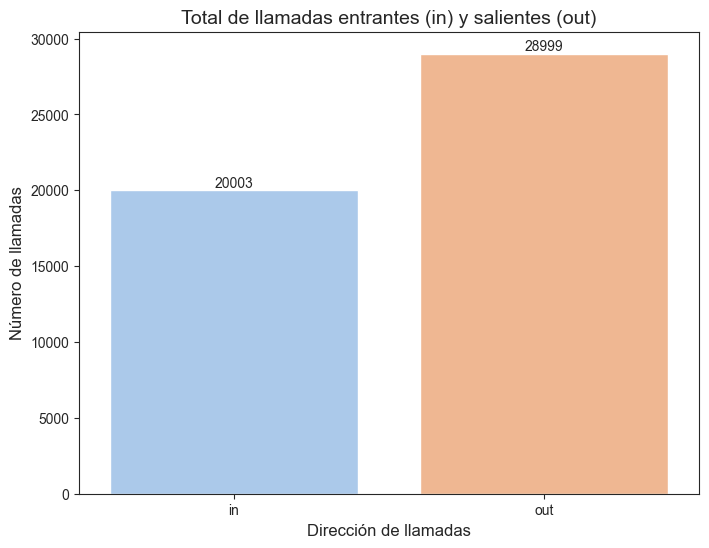

In [12]:
# se configura el tamaño y el estilo de color para el gráfico
plt.figure(figsize=(8, 6))
sns.set_style("ticks")

# se realiza el gráfico con seaborn (sns) a partir del DataFrame 'chain_true'
fig5 = sns.barplot(data= total_in_out, x='direction', y='total_calls', hue= "total_calls", palette='pastel', legend= False)

#bucle para etiquetar cada barra 
for i in fig5.containers:
    fig5.bar_label(i, fontsize=10)


# se le asigan un título y nombres de los ejes al gráfico
fig5.set_title('Total de llamadas entrantes (in) y salientes (out)', fontsize= 14)
fig5.set_xlabel('Dirección de llamadas', fontsize= 12)
fig5.set_ylabel('Número de llamadas', fontsize= 12)
plt.show()


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
El número de llamadas salientes es mayor que el número de llamadas entrantes, con 20003 y 28999, respectivamente. Lo cual podría indicar que los operadores están siendo eficaces.  

</span>

</div>

In [13]:
# calculo de llamadas perdidas 
missed_calls = telecom.groupby('is_missed_call')[['is_missed_call']].count()
missed_calls = missed_calls.rename(columns= {'is_missed_call': 'num_calls'})
missed_calls

,num_calls
is_missed_call,
False,27549
True,21453


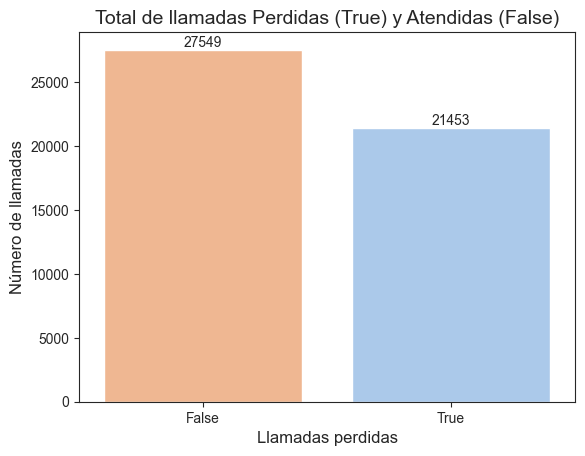

In [14]:
# se realiza el gráfico con seaborn (sns) a partir del DataFrame 'missed_calls'
fig6 = sns.barplot(data= missed_calls, x='is_missed_call', y='num_calls', hue= "num_calls", palette='pastel', legend= False)

#bucle para etiquetar cada barra 
for i in fig6.containers:
    fig6.bar_label(i, fontsize=10)


# se le asigan un título y nombres de los ejes al gráfico
fig6.set_title('Total de llamadas Perdidas (True) y Atendidas (False)', fontsize= 14)
fig6.set_xlabel('Llamadas perdidas', fontsize= 12)
fig6.set_ylabel('Número de llamadas', fontsize= 12)
plt.show()

In [15]:
# calculo de proporción de llamadas perdidas
total_calls = missed_calls['num_calls'].sum()

# calculo de proporción de llamadas perdidas
pct_missed_calls = missed_calls.loc[True,'num_calls'] / total_calls * 100

print(f'El porcentaje de llamadas perdidas es de {round(pct_missed_calls, 1)} %')

El porcentaje de llamadas perdidas es de 43.8 %


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
A pesar que la mayoría de las llamadas fueron atendidas, no obstante el porcentaje de llamadas perdidas es muy alto, de 43.8 %. Lo ideal sería tener un porcentaje de llamadas perdidas bajo.    

</span>

</div>

# Tasa de llamadas perdidas por operador  <a id='missed'></a>  

`Tasa de abandono de llamadas = Total de llamadas perdidas / Total de llamadas * 100`

In [17]:
# ahora se filtra el DataFrame 'telecom' para las llamadas que son perdidas del DataFrame
missed_calls = telecom[telecom['is_missed_call'] == True]
missed_calls.head()


,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,unknown,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25,B,2019-08-01
6,166377,2019-08-05 00:00:00+03:00,out,False,880020.0,True,8,0,50,50,B,2019-08-01


In [18]:
# se calculan el total de llamadas por operador 
total_calls_op = telecom.groupby('operator_id')[['calls_count']].sum()

# se reinicia el índice
total_calls_op.reset_index(inplace= True)

# se renobra la columna
total_calls_op = total_calls_op.rename(columns= {'calls_count': 'calls_total'})
total_calls_op.head()

,operator_id,calls_total
0,879896.0,930
1,879898.0,7313
2,880020.0,45
3,880022.0,197
4,880026.0,2232
...,...,...
1088,972412.0,61
1089,972460.0,51
1090,973120.0,3
1091,973286.0,2


In [19]:
# se agrupan los datos por operador y se calcula las llamdas perdidas 
missed_calls_op = missed_calls.groupby('operator_id').agg({'is_missed_call': 'count'})
# se renombran las columnas
missed_calls_op = missed_calls_op.rename(columns= {'is_missed_call': 'total_missed_calls'})
missed_calls_op.reset_index(inplace= True)

missed_calls_op.head()

,operator_id,total_missed_calls
0,879896.0,47
1,879898.0,89
2,880020.0,6
3,880022.0,29
4,880026.0,87
...,...,...
872,972410.0,2
873,972412.0,2
874,972460.0,3
875,973120.0,1


In [20]:
# se unen los DataFrames 'total_calls_op' y 'missed_calls_op' con merge() 
op_churn_rate = total_calls_op.merge(missed_calls_op, on= 'operator_id', how= 'outer')
op_churn_rate.head()

,operator_id,calls_total,total_missed_calls
0,879896.0,930,47.0
1,879898.0,7313,89.0
2,880020.0,45,6.0
3,880022.0,197,29.0
4,880026.0,2232,87.0


In [21]:
# se calculan valores ausente
op_churn_rate.isna().sum()

operator_id             0
calls_total             0
total_missed_calls    216
dtype: int64

In [22]:
# los valores ausentes se siustituyen con 0, ya que esos operadores no tuvieron llamadas perdidas
op_churn_rate.fillna(0, inplace= True)

In [23]:
# se calcula la tasa de llamadas perdidas por operador
op_churn_rate['pct_missed_calls'] = op_churn_rate['total_missed_calls'] / op_churn_rate['calls_total'] * 100

# se muestran los valores ordenados de mayor a menor porcentaje de abandono de llamadas
op_churn_rate.sort_values(by= 'pct_missed_calls', ascending= False).head()


,operator_id,calls_total,total_missed_calls,pct_missed_calls
698,937772.0,1,1.0,100.0
617,932246.0,1,1.0,100.0
253,905480.0,1,1.0,100.0
970,954284.0,1,1.0,100.0
160,899076.0,2,2.0,100.0


In [24]:
# se grafica un histograma para la distribución del porcentaje de llamadas perdidas
fig7 =  px.histogram(op_churn_rate,
                     x="pct_missed_calls",
                     title= 'Distribución del porcentaje de llamadas perdidas para los operadores',
                     nbins= 80
                     )
fig7.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
Se observa qu la distribución de los porcentajes de llamadas perdidas por operador no es normal, tiene un sesgo hacia la derecha, ya que hay operadores que tienen un porcentaje alto de llamadas perdidas, mayores al 10 %. De acuerdo al estudio de Finance Online que una tasa de abandono o porcentaje de abandono de llamadas del 5 % es aceptable (<https://financesonline.com/call-center-statistics/>).  

</span>

</div>

# Tiempo Medio Operativo (TMO) <a id='tmo'></a>

Brinda información sobre la duración media de las llamadas o transacciones en un período determinado.

`TMO = Tiempo total de espera hasta ser atendido + Tiempo total de conversación + Tiempo total de tareas después de la llamada / número total de llamadas atendidas`. En el DataFrame `telecom` se tiene la columna `total_call_duration` que tiene la duración de las llamadas incluyendo el tiempo de espera por tanto se empleara para el cálculo del TMO como numerador.

In [25]:
# del DataFrame 'Telecom' se calculan el tiempo total de la duración de las llamadas por operador
tot_call_dur_op = telecom.groupby('operator_id')[['total_call_duration']].sum()

# se reinicia el índice
tot_call_dur_op.reset_index(inplace= True)

tot_call_dur_op.head()

,operator_id,total_call_duration
0,879896.0,76137
1,879898.0,361288
2,880020.0,2525
3,880022.0,18925
4,880026.0,175526


In [26]:
# los DataFrames 'tot_call_dur_op' y 'op_churn_rate' con merge
op_metrics = op_churn_rate.merge(tot_call_dur_op, on= 'operator_id')

op_metrics.head()

,operator_id,calls_total,total_missed_calls,pct_missed_calls,total_call_duration
0,879896.0,930,47.0,5.053763,76137
1,879898.0,7313,89.0,1.217011,361288
2,880020.0,45,6.0,13.333333,2525
3,880022.0,197,29.0,14.720812,18925
4,880026.0,2232,87.0,3.897849,175526


In [27]:
# se calcula el tiempo medio operativo, se divide el tiempo total de las llamadas entre el total de las llamadas
op_metrics['tmo'] = op_metrics['total_call_duration'] / op_metrics['calls_total']

op_metrics.head()

,operator_id,calls_total,total_missed_calls,pct_missed_calls,total_call_duration,tmo
0,879896.0,930,47.0,5.053763,76137,81.867742
1,879898.0,7313,89.0,1.217011,361288,49.403528
2,880020.0,45,6.0,13.333333,2525,56.111111
3,880022.0,197,29.0,14.720812,18925,96.065990
4,880026.0,2232,87.0,3.897849,175526,78.640681


In [28]:
# se grafica un histograma para la distribución del tiempo medio operativo (tmo)
fig8 =  px.histogram(op_metrics,
                     x="tmo",
                     title= 'Distribución del tiempo medio operativo (TMO) para los operadores',
                     nbins= 80
                     )
fig8.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
Se observa que la distribución de los datos del tiempo medio operativo (TMO) no es normal, ya que hay datos muy grandes que provocan un sesgo hacia la derecha. Para mejora la métrica TMO va a depender de la industria, en este caso no se conocen las unidades del tiempo de las llamadas, podrían ser minutos o segundos, en el caso de llamadas puede ser más complejo, ya que depende de diferente factores que pueden influir en la duración de las llamadas (<https://www.cloudtalk.io/es/blog/todo-lo-que-necesitas-saber-sobre-el-tmo-tiempo-medio-operativo/>). No obstante, si hay operadores con tiempos medios muy altos, como se aprecia en el histograma que hay una gran cantidad de valores hacia la derecha.  
Con base en lo anterior, en pasos posteriores los datos se filtran donde los valores del TMO sea mayor al valor de la mediana del TMO, ya que la mediana es menos sensible a los valores atípicos.  

</span>

</div>

# Tasa del tiempo de espera por operador/a <a id='waiting_time'></a>

In [29]:
# del DataFrame 'telecom' se calculan el tiempo de espera total por operador
tot_wait_time = telecom.groupby('operator_id')[['waiting_time']].sum()
# se reinicia el índice
tot_wait_time.reset_index(inplace= True)

tot_wait_time.head()

,operator_id,waiting_time
0,879896.0,12275
1,879898.0,103897
2,880020.0,280
3,880022.0,3778
4,880026.0,22200


In [30]:
# los DataFrames 'op_metrics' y 'tot_wait_time' se unene con merge
op_metrics = op_metrics.merge(tot_wait_time, on= 'operator_id')

op_metrics.head()

,operator_id,calls_total,total_missed_calls,pct_missed_calls,total_call_duration,tmo,waiting_time
0,879896.0,930,47.0,5.053763,76137,81.867742,12275
1,879898.0,7313,89.0,1.217011,361288,49.403528,103897
2,880020.0,45,6.0,13.333333,2525,56.111111,280
3,880022.0,197,29.0,14.720812,18925,96.065990,3778
4,880026.0,2232,87.0,3.897849,175526,78.640681,22200


In [31]:
# se calcula el porcentaje de tiempo de espera, se divide el tiempo total en espera  entre el total del tiempo de las llamadas
op_metrics['pct_waiting_time'] = op_metrics['waiting_time'] / op_metrics['total_call_duration'] * 100

op_metrics.head()

,operator_id,calls_total,total_missed_calls,pct_missed_calls,total_call_duration,tmo,waiting_time,pct_waiting_time
0,879896.0,930,47.0,5.053763,76137,81.867742,12275,16.122253
1,879898.0,7313,89.0,1.217011,361288,49.403528,103897,28.757390
2,880020.0,45,6.0,13.333333,2525,56.111111,280,11.089109
3,880022.0,197,29.0,14.720812,18925,96.065990,3778,19.963012
4,880026.0,2232,87.0,3.897849,175526,78.640681,22200,12.647699


In [32]:
# se grafica un histograma para la distribución del porcentaje del tiempo de espera
fig9 =  px.histogram(op_metrics,
                     x="pct_waiting_time",
                     title= 'Distribución del porcentaje del tiempo de espera para los operadores',
                     nbins= 80
                     )
fig9.show()

In [33]:
# se calculan los estadísticos descritivos para el DataFrame
op_metrics_est = op_metrics.describe()
op_metrics_est

,calls_total,total_missed_calls,pct_missed_calls,total_call_duration,tmo,waiting_time,pct_waiting_time
count,1093.000000,1093.000000,1093.000000,1.093000e+03,1093.000000,1.093000e+03,1088.000000
mean,738.068618,19.627630,10.107248,5.185148e+04,90.486623,1.301382e+04,27.097871
std,4268.863633,222.477775,16.878212,2.446223e+05,79.901148,7.485927e+04,20.667755
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.401015
25%,10.000000,1.000000,0.831734,5.730000e+02,47.789474,1.390000e+02,13.219230
50%,72.000000,5.000000,4.368932,6.726000e+03,77.397661,1.023000e+03,21.109506
75%,496.000000,18.000000,12.096774,4.394000e+04,109.558725,7.780000e+03,33.655362
max,104564.000000,7343.000000,100.000000,5.733237e+06,1338.000000,1.443002e+06,100.000000


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
En el histograma se observa que el porcentaje del tiempo de espera para los operadores tiene un sesgo hacia la derecha, lo cual inidica que hay varios operadores con tiempos de espera muy altos. Por otro lado, en promedio el porcentaje de llamdas perdidas es de 10.1 %, el tiempo medio operativo  en promedio es de 90.5 y el porcentaje de tiempo en espera en promedio es de  27.1 %. En general hay área de oprtunidad para mejorar la eficiencia de los operadores, los promedios de las métricas mencionadas anteriormente son mucho mayores que la mediana, y se debe principalmente a que hay valores muy grandes en cada una de estas y el promedio es mas sensible a cambios cuando hay valores muy grandes o atípicos.

Por tanto, para fines de este análisis se separan los operadores que tienen un porcentaje de llamadas perdidas mayor a la 5 %, los operadores que tienen un TMO mayor a 77 y los operadores que tienen un porcentaje de tiempo de espera mayor al 21 %. Los punto de corte mencionados anteriormente se establecieron con base en la mediana de cada métrica, debido a que la mediana es menos sensible a los valores atípicos.

</span>

</div>

In [34]:
# se filtra el DataFrame 'op_metrics'
ineffect_op_id_missed_call = op_metrics[op_metrics['pct_missed_calls'] > 5]['operator_id']

In [35]:
# se filtran el DataFrame 'op_metrics' para los valor donde el valor de TMO se mayor a 77
ineffect_op_id_tmo = op_metrics[op_metrics['tmo'] > 77]['operator_id']

# se filtran el DataFrame 'op_metrics' para los valor donde el valor del porcentaje del tiempo de espera sea mayor a 21
ineffect_op_id_wait_time = op_metrics[op_metrics['pct_waiting_time'] > 21]['operator_id']

In [36]:
# se buscan los operadores en comun entre los Series 'ineffect_op_id_missed_call' y 'ineffect_op_id_tmo'
# o los operadores en comun entre los Series 'ineffect_op_id_missed_call' y 'ineffect_op_id_wait_time'
common_values_1 = ineffect_op_id_missed_call[ineffect_op_id_missed_call.isin(ineffect_op_id_tmo) | (ineffect_op_id_missed_call.isin(ineffect_op_id_wait_time))]

# se buscan los operadores en comun entre los Series 'ineffect_op_id_tmo' y 'ineffect_op_id_wait_time'
common_values_2 = ineffect_op_id_tmo[ineffect_op_id_tmo.isin(ineffect_op_id_wait_time)]

# ahora se se buscan los operadores en comun entre los dos Series
common_values_3 = common_values_1[common_values_1.isin(common_values_2)]


La cantidad de operadores con una menor eficiencia en las tres metricas son: 35


In [114]:
print(f'La cantidad de operadores con una menor eficiencia en el porcentaje de llamadas perdidas son: {len(ineffect_op_id_missed_call)}')

print(f'La cantidad de operadores con una menor eficiencia en el tiempo medio de operación son: {len(ineffect_op_id_tmo)}')

print(f'La cantidad de operadores con una menor eficiencia en el tiempo de espera son: {len(ineffect_op_id_wait_time)}')

print(f'La cantidad de operadores con una menor eficiencia en las tres metricas son: {len(common_values_3)}')

La cantidad de operadores con una menor eficiencia en el porcentaje de llamadas perdidas son: 519
La cantidad de operadores con una menor eficiencia en el tiempo medio de operación son: 550
La cantidad de operadores con una menor eficiencia en el tiempo de espera son: 548
La cantidad de operadores con una menor eficiencia en las tres metricas son: 35


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
En las tres métricas la cantidad de operadores con una baja eficiencia son alrededor de 500 y un total de 35 opoperadores tienen una baja eficiencia en las tres métricas.

</span>

</div>

# Relación entre la tasa de llamadas internas y la duración de las llamadas <a id='corr'></a> 

In [37]:
# se contabilizan las llamadas internas y externas
total_internal_external = telecom.groupby('internal')[['internal']].count()
# se renombra la columna 'direction'
total_internal_external = total_internal_external.rename(columns= {'internal': 'total_calls'})

# se reinicia el índice
total_internal_external.reset_index(inplace= True)

total_internal_external

,internal,total_calls
0,False,43239
1,True,5763


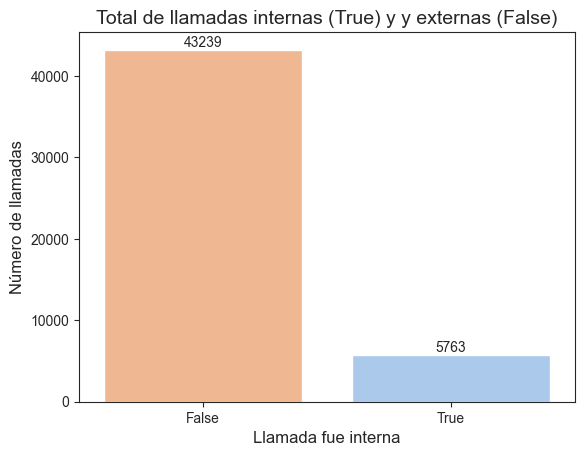

In [38]:
# se realiza el gráfico con seaborn (sns) a partir del DataFrame 'chain_true'
fig10 = sns.barplot(data= total_internal_external,
                    x='internal',
                    y='total_calls',
                    hue= "total_calls",
                    palette='pastel',
                    legend= False
                    )

#bucle para etiquetar cada barra 
for i in fig10.containers:
    fig10.bar_label(i, fontsize=10)


# se le asigan un título y nombres de los ejes al gráfico
fig10.set_title('Total de llamadas internas (True) y y externas (False)', fontsize= 14)
fig10.set_xlabel('Llamada fue interna', fontsize= 12)
fig10.set_ylabel('Número de llamadas', fontsize= 12)
plt.show()

In [39]:
# se filtran las  llamadas internas y se cuentan por operador
internal_calls_per_operator = telecom[telecom['internal'] == True].groupby('operator_id')[['calls_count']].sum()

# se renombra la columna 
internal_calls_per_operator = internal_calls_per_operator.rename(columns= {'calls_count': 'total_calls_internal'})

# se reinicia el índice
internal_calls_per_operator.reset_index(inplace= True)

internal_calls_per_operator.head()


,operator_id,total_calls_internal
0,879896.0,56
1,879898.0,19
2,880020.0,4
3,880022.0,15
4,880026.0,20


In [40]:
# el DataFrame 'total_calls_op' tiene las llamadas por operador
# se unen los DataFrame 'total_calls_op' y 'internal_calls_per_operator'
inter_calls_per_operator = total_calls_op.merge(internal_calls_per_operator, on= 'operator_id', how= 'outer')

inter_calls_per_operator.head()

,operator_id,calls_total,total_calls_internal
0,879896.0,930,56.0
1,879898.0,7313,19.0
2,880020.0,45,4.0
3,880022.0,197,15.0
4,880026.0,2232,20.0


In [41]:
# los valores nulos se sustituyen con 0
inter_calls_per_operator.fillna(0, inplace= True)

In [42]:
# se calculan la tasa de llamadas internas por operador (expresada en porcentaje)
inter_calls_per_operator['pct_calls_internal'] = inter_calls_per_operator['total_calls_internal'] / inter_calls_per_operator['calls_total'] * 100

inter_calls_per_operator.head()

,operator_id,calls_total,total_calls_internal,pct_calls_internal
0,879896.0,930,56.0,6.021505
1,879898.0,7313,19.0,0.259811
2,880020.0,45,4.0,8.888889
3,880022.0,197,15.0,7.614213
4,880026.0,2232,20.0,0.896057


In [43]:
# se calcula la duración promedio de la llamada por operador
avg_call_duration_per_operator = telecom.groupby('operator_id')[['call_duration']].mean()

# se renombra la columna 
avg_call_duration_per_operator = avg_call_duration_per_operator.rename(columns= {'call_duration': 'avg_call_duration'})

# se reinicia el índice
avg_call_duration_per_operator.reset_index(inplace= True)

avg_call_duration_per_operator.head()


,operator_id,avg_call_duration
0,879896.0,545.829060
1,879898.0,1133.881057
2,880020.0,112.250000
3,880022.0,216.385714
4,880026.0,842.450549


In [44]:
# se crea un gráfico de dispersión para visualizar la relación
fig11 = px.scatter(x= inter_calls_per_operator['pct_calls_internal'], 
                 y= avg_call_duration_per_operator['avg_call_duration'],
                 labels={
                     'x': "Tasa de llamadas internas por operador",
                     'y': "Duración promedio de la llamada por operador"
                 },
                 title="Relación entre la tasa de llamadas internas y la duración promedio de la llamada"
                 )
fig11.show()

In [45]:
# calculo del coeficiente de correlación
corr_internal_duration = inter_calls_per_operator['pct_calls_internal'].corr(avg_call_duration_per_operator['avg_call_duration'])
print(corr_internal_duration)

-0.20196689270520166


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
La cantidad de llamadas internas fueron 5763, mientras que las llamadas que no fueron internas fueron de 43239, por tanto se tienen una menor cantidad de llamadas internas entre los operadores. Además, no hay una correlación entre la tasa de llamadas internas y el promedio de la duración de las llamadas. Lo cual se puede reafirmar con el coeficiente de correlación, con un valor negativo de -0.2, pero es muy cercano a 0 indicando que no hay una correlación fuerte.  

</span>

</div>

# Duración de las llamadas de acuerdo al plan tarifario <a id='plan'></a>

In [46]:
# se calcula el promedio de la duración total de las llamadas
plan_mean_dur_calls = telecom.groupby('tariff_plan')[['total_call_duration']].mean()

# se renombran las columnas
plan_mean_dur_calls = plan_mean_dur_calls.rename(columns= {'total_call_duration': 'avg_total_call_duration'})

# se reinicia el índice
plan_mean_dur_calls.reset_index(inplace= True)

plan_mean_dur_calls


,tariff_plan,avg_total_call_duration
0,A,2208.868693
1,B,764.409120
2,C,744.363831


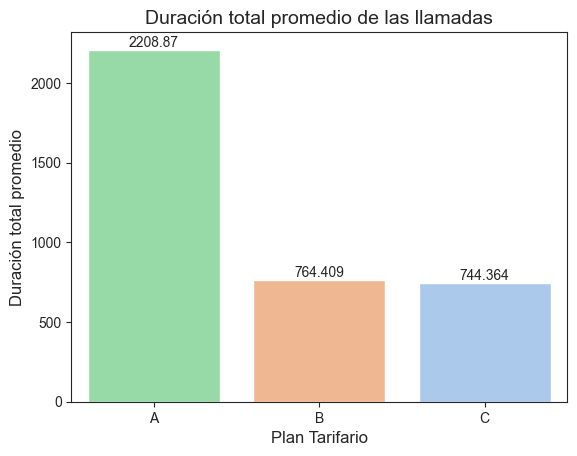

In [47]:
# se realiza el gráfico con seaborn (sns) a partir del DataFrame 'plan_mean_dur_calls'
fig12 = sns.barplot(data= plan_mean_dur_calls,
                    x='tariff_plan',
                    y='avg_total_call_duration',
                    hue= "avg_total_call_duration",
                    palette='pastel',
                    legend= False
                    )

#bucle para etiquetar cada barra 
for i in fig12.containers:
    fig12.bar_label(i, fontsize=10)


# se le asigan un título y nombres de los ejes al gráfico
fig12.set_title('Duración total promedio de las llamadas', fontsize= 14)
fig12.set_xlabel('Plan Tarifario', fontsize= 12)
fig12.set_ylabel('Duración total promedio', fontsize= 12)
plt.show()

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
El plan tarifario A tiene la mayor duración promedio de llamadas, seguido del plan B y C, con 2208.8, 764.4 y 744.3, respectivamente.  

</span>

</div>

# Hipótesis <a id='hip'></a>

## Impacto de la cantidad de llamadas perdidas y la duración del tiempo de espera

Ho: No hay diferencia significativa en la duracion de espera de la llamada entre aquellos que tienen llamadas perdidas y aquellos que no las tienen.  

Ha: Hay una diferencia significativa en la duracion de espera de la llamada entre aquellos que tienen llamadas perdidas y aquellos que no las tienen.


In [48]:
telecom.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,unknown,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01


In [49]:
# con numpy se calculan los percentiles 90, 95 y 99 del DataFrame 'telecom' para la columna de 'total_call_duration'
print(np.percentile(telecom['waiting_time'], [90, 95, 99]))

[ 613.   1163.   3157.91]


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

**Observaciones:**  
Al calcular los percentiles del número de llamadas  se observa que no más del 5 % de la duración de tiempo de espera  duraron más de 1163.

Con base a o anterior para las pruebas de hipótesis se filtraran los datos donde la duración total de las llamadas sea menor o igual a 1163.

</span>

</div>

In [50]:
# se filtra el DataFrame
telecom_95 = telecom[telecom['waiting_time'] <= 1163]
telecom_95.head()

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,waiting_time,tariff_plan,date_start
0,166377,2019-08-04 00:00:00+03:00,in,False,unknown,True,2,0,4,4,B,2019-08-01
1,166377,2019-08-05 00:00:00+03:00,out,True,880022.0,True,3,0,5,5,B,2019-08-01
2,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,True,1,0,1,1,B,2019-08-01
3,166377,2019-08-05 00:00:00+03:00,out,True,880020.0,False,1,10,18,8,B,2019-08-01
4,166377,2019-08-05 00:00:00+03:00,out,False,880022.0,True,3,0,25,25,B,2019-08-01


In [51]:
# se separan los datos en dos grupos: operadores con llamadas perdidas y operadores sin llamadas perdidas
no_missed_calls_operators = telecom_95[telecom_95['is_missed_call'] == 0]
missed_calls_operators = telecom_95[telecom_95['is_missed_call'] == 1]

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;"> 

Para probar la hipótesis se empleará la función `scipy.stats.ttest_ind(array1, array2, equal_var)`.  
Se empleará el DataFrame `no_missed_calls_operators` y el DataFrame `missed_calls_operators`, en cada uno de los DataFrame se selecciona la columna `total_call_duration`.  
    
Para determinar el valor del parámetro `equal_var` se hace un test de levene para saber si las varianzas son iguales o diferentes.
El valor de alfa será de 5 % (0.05).  

La hipótesis nula (H0) en el test de Levene es que todas las poblaciones tienen varianzas iguales.  
La hipótesis alternativa (Ha) es que al menos una de las poblaciones tiene una varianza diferente.

</span>

</div>

In [52]:
# función para la prueba de levene
def test_levene(sample_1, sample_2, alpha= 0.05):
    levene_test = st.levene(sample_1, sample_2)

    p_value = levene_test.pvalue


    if p_value < alpha:
        print('El valor p en el test de levene es:', p_value)
        result= 'Se rechaza la hipótesis nula'
    else:
        result = 'No se rechaza la hipótesis nula'
    
    return print(result)

# función para la prueba de hipótesis con ttest_ind()
def hypothesis_test(sample_1, sample_2, alpha= 0.05, equal_var= True):

    results_score = st.ttest_ind(sample_1, sample_2, equal_var)

    p_value = results_score.pvalue


    if p_value < alpha:
        print('El valor p en el test de levene es:', p_value)
        result= 'Se rechaza la hipótesis nula'
    else:
        result = 'No se rechaza la hipótesis nula'
    
    return print(result)

In [53]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre loa dos grupos
levene_result_hip_1 = test_levene(no_missed_calls_operators['waiting_time'], missed_calls_operators['waiting_time'], alpha= 0.05)
levene_result_hip_1

El valor p en el test de levene es: 2.8997433620200006e-27
Se rechaza la hipótesis nula


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;"> 

De acuerdo al resultado del test de levene se rechaza la hipótesis nula, por lo que las varianzas son diferentes. Entonces el parámetro `equal_var` se deja como `False`.

</span>

</div>

In [54]:
# Se realiza la prueba las hipótesis
hip_1_result = hypothesis_test(no_missed_calls_operators['waiting_time'], missed_calls_operators['waiting_time'], alpha= 0.05, equal_var= False)
hip_1_result

El valor p en el test de levene es: 2.2341536958787805e-14
Se rechaza la hipótesis nula


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;"> 

De acuerdo al resultado, podemos rechazar la hipósis nula, por lo que si hay una diferencia significativa en la duración del tiempo de espera entre los operadores que tienen llamadas perdidas y los que no las tienen. El valor de p  es demasiado bajo para concluir que no existe una diferencia significativa entre los operadores que tienen llamdas perdidas y los que no las tienen en el tiempo de espera.

</span>

</div>

## Impacto de los diferentes planes de tarifas en la duración total de las llamadas.  

Ho: La tarifa del cliente (A, B o C) no afecta significativamente en la duranción de las llamadas. 

Ha: Hay una diferencia significativa en la duranción de las llamadas entre las tarifa del cliente (A, B o C).

In [55]:
# se filtra el DataFrame telecom_95 para cada una de las tarifas
plan_a = telecom_95[telecom_95['tariff_plan'] == 'A']
plan_b = telecom_95[telecom_95['tariff_plan'] == 'B']
plan_c = telecom_95[telecom_95['tariff_plan'] == 'C']

In [56]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre los dos grupos
# entre los dos grupos son los del plan a y b
levene_result_hip_2_ab = test_levene(plan_a['total_call_duration'], plan_b['total_call_duration'], alpha= 0.05)
levene_result_hip_2_ab

El valor p en el test de levene es: 4.5217930970796565e-10
Se rechaza la hipótesis nula


In [57]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre los dos grupos
# entre los dos grupos son los del plan a y c
levene_result_hip_2_ac = test_levene(plan_a['total_call_duration'], plan_c['total_call_duration'], alpha= 0.05)
levene_result_hip_2_ac

El valor p en el test de levene es: 1.4846712348071715e-20
Se rechaza la hipótesis nula


In [58]:
# se realiza el test de levene para realizar una prueba de igualdad de varianzas entre los dos grupos
# entre los dos grupos son los del plan a y b
levene_result_hip_2_bc = test_levene(plan_b['total_call_duration'], plan_c['total_call_duration'], alpha= 0.05)
levene_result_hip_2_bc

El valor p en el test de levene es: 0.00026977625789181424
Se rechaza la hipótesis nula


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;"> 

De acuerdo a los resultados del test de levene se rechaza la hipótesis nula, por lo que las varianzas son diferentes en los tres casos. Entonces el parámetro `equal_var` se deja como `False`.

</span>

</div>

In [59]:
# Se realiza la prueba las hipótesis entre los grupos a y b
hip_1_result_ab = hypothesis_test(plan_a['total_call_duration'], plan_b['total_call_duration'], alpha= 0.05, equal_var= False)
hip_1_result_ab

El valor p en el test de levene es: 1.3626859554335745e-11
Se rechaza la hipótesis nula


In [60]:
# Se realiza la prueba las hipótesis entre los grupos a y c
hip_1_result_ac = hypothesis_test(plan_a['total_call_duration'], plan_c['total_call_duration'], alpha= 0.05, equal_var= False)
hip_1_result_ac

El valor p en el test de levene es: 2.5301343894870912e-24
Se rechaza la hipótesis nula


In [61]:
# Se realiza la prueba las hipótesis entre los grupos a y b
hip_1_result_bc = hypothesis_test(plan_b['total_call_duration'], plan_c['total_call_duration'], alpha= 0.05, equal_var= False)
hip_1_result_bc

El valor p en el test de levene es: 5.0562419026977214e-05
Se rechaza la hipótesis nula


<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;"> 

De acuerdo al resultado, podemos rechazar la hipótesis nula, por lo que si hay una diferencia significativa en la duración de las llamadas entre los tres planes tarifarios. El valor de p es demasiado bajo para concluir que no existe una diferencia significativa entre estos planes tarifarios.

</span>

</div>

# Conclusión General <a id='end'></a>

<div style="background-color: lightyellow; padding: 10px;">

<span style="color: darkblue;">  

• La distribución del número de llamadas tiene un sesgo hacia la derecha, evidenciado por la presencia de valores atípicos. Esto provoca una gran variabilidad en los datos, la desviación estándar significativamente es muy alta (63.6). Los valores extremos afectan la normalidad de la distribución, lo anterior también sucede con los valores de la duración de las llamadas y el tiempo en espera.  

• La cantidad de llamadas salientes es superior (28999) a las llamadas entrantes (20003), lo que puede indicar que los operadores tienden a iniciar más contactos que recibirlos. Lo anterior puede sugerir una eficacia en la generación de interacciones.  

• Aunque la mayoría de las llamadas fueron atendidas, hay un  alto porcentaje de llamadas perdidas (43.8%), lo cual sugiere una oportunidad de mejora en la eficiencia del manejo de llamadas.  

• La distribución del porcentaje de llamadas perdidas por operador tiene un sesgo hacia la derecha, de modo que algunos operadores tienen un alto porcentaje de llamadas perdidas. La distribución de los datos del TMO y la distribución del porcentaje de tiempo de espera también tienen un sesgo hacia la derecha debido a la presencia de valores muy altos.  

• En las tres métricas la cantidad de operadores con una baja eficiencia son alrededor de 500 y un total de 35 opoperadores tienen una baja eficiencia en las tres métricas.

• Hay menos cantidad llamadas internas entre los operadores en comparación con las llamadas no internas. No se observa una correlación significativa entre la tasa de llamadas internas y la duración promedio de las llamadas.  

• El plan tarifario A tiene la mayor duración promedio de llamadas, seguido del plan B y C, con 2208.8, 764.4 y 744.3, respectivamente.  

• Con base en los resultados de las pruebas de hipótesis: hay una diferencia significativa en el tiempo de espera entre operadores con y sin llamadas perdidas. De la misma manera hay una diferencia significativa en la duración de las llamadas entre los tres planes tarifarios.  

• En general, los resultados de los análisis sugieren que hay en áreas de oportunidad para mejorar la eficiencia de los operadores, especial en la gestión de llamadas perdidas y el tiempo de espera. La presencia de valores atípicos impacta significativamente en las métricas analizadas.  

 

</span>

</div>